In [1]:
import numpy as np
import pandas as pd
import os
import torch
import matplotlib.pyplot as plt
from torch import nn,optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [2]:
print("Torch Version:",torch.__version__)

Torch Version: 1.3.1


In [3]:
# Loading the downloaded dataset
data=pd.read_csv(r'D:\DS\Deep Learning\Digit\train.csv')
test=pd.read_csv(r'D:\DS\Deep Learning\Digit\test.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(42000, 785)

In [6]:
test.shape

(28000, 784)

In [7]:
ydata=data.label.values
xdata=data.drop('label',axis=1)
xdata=xdata.values/255 #Min max normalization

In [8]:
xtrain,xval,ytrain,yval=train_test_split(xdata,ydata,test_size=0.2)

In [9]:
xtrain=torch.from_numpy(xtrain).float()
xval=torch.from_numpy(xval).float()
ytrain=torch.from_numpy(ytrain).float()
yval=torch.from_numpy(yval).float()

In [10]:
train = torch.utils.data.TensorDataset(xtrain,ytrain)
val = torch.utils.data.TensorDataset(xval,yval)

In [11]:
trainloader = torch.utils.data.DataLoader(train, batch_size = 100, shuffle = True)
valloader = torch.utils.data.DataLoader(val, batch_size = 100, shuffle = True)

In [12]:
trainloader

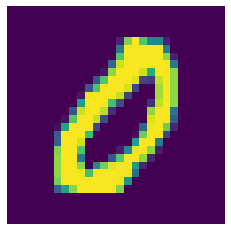

In [13]:
plt.imshow(xtrain[33599].reshape(28,28))
plt.axis("off")
plt.show()

In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
#Printing the size of one image
print(images[1].numpy().squeeze().shape)

<class 'torch.Tensor'>
torch.Size([100, 784])
torch.Size([100])
(784,)


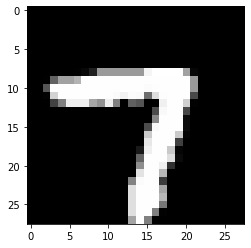

In [15]:
#Look at the image
plt.imshow(images[1].reshape(28,28), cmap='Greys_r')

In [16]:
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        return x

In [17]:
model=ffn()
model

ffn(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [18]:
print(model.hidden.weight,model.hidden.weight.shape)
print(model.hidden.bias,model.hidden.bias.shape)

Parameter containing:
tensor([[-0.0195, -0.0322, -0.0135,  ..., -0.0352, -0.0004,  0.0102],
        [ 0.0332,  0.0101, -0.0273,  ...,  0.0036,  0.0003, -0.0086],
        [ 0.0147, -0.0092, -0.0292,  ..., -0.0011,  0.0356, -0.0330],
        ...,
        [-0.0318,  0.0247,  0.0190,  ..., -0.0028,  0.0234,  0.0339],
        [ 0.0288,  0.0304,  0.0067,  ..., -0.0179, -0.0032, -0.0137],
        [-0.0015,  0.0336, -0.0068,  ...,  0.0047,  0.0137,  0.0282]],
       requires_grad=True) torch.Size([256, 784])
Parameter containing:
tensor([-0.0282,  0.0299, -0.0313,  0.0019,  0.0016, -0.0163, -0.0211,  0.0019,
        -0.0336, -0.0299, -0.0343,  0.0355, -0.0039, -0.0186,  0.0063,  0.0223,
         0.0141,  0.0068,  0.0075, -0.0305,  0.0291,  0.0268, -0.0173,  0.0046,
        -0.0157,  0.0264, -0.0322, -0.0314,  0.0354, -0.0322, -0.0053,  0.0238,
         0.0201,  0.0111, -0.0349,  0.0178, -0.0072,  0.0351, -0.0004,  0.0058,
         0.0249, -0.0281, -0.0100,  0.0267, -0.0276, -0.0103, -0.0016, -

D:\Software\Anaconda\lib\site-packages\torch\tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
D:\Software\Anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(0, 1)

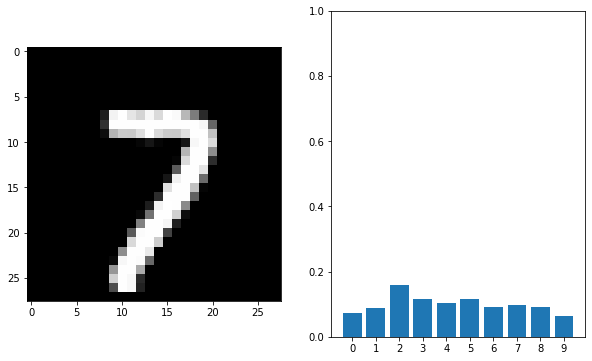

In [19]:
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Forward pass through the network
ps = model.forward(images[0].resize(1,784))
img = images[0]
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(images[0].reshape(28,28), cmap='Greys_r')
plt.subplot(1,2,2)
op=ps.detach().numpy()
l=np.arange(0,10)
plt.bar(l,op.tolist()[0])
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(0,1)

In [164]:
ydata=data.label.values
xdata=data.drop('label',axis=1)
xdata=xdata.values/255 #Min max normalization
xtrain,xval,ytrain,yval=train_test_split(xdata,ydata,test_size=0.2)
xtrain=torch.from_numpy(xtrain).float().cuda()
xval=torch.from_numpy(xval).float().cuda()
ytrain=torch.from_numpy(ytrain).long().cuda()
yval=torch.from_numpy(yval).long().cuda()
train = torch.utils.data.TensorDataset(xtrain,ytrain)
val = torch.utils.data.TensorDataset(xval,yval)
trainloader = torch.utils.data.DataLoader(train, batch_size = 100, shuffle = True)
valloader = torch.utils.data.DataLoader(val, batch_size = 100, shuffle = True)

### Training

In [71]:
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()

ffn(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [72]:
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

In [73]:
# Test run
epochs=10
train_losses,val_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call out feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        running_loss+=loss.item()
        
    else:
        val_loss=0
        accuracy=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #To let model know we are evaluating and not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(trainloader))
        val_losses.append(val_loss/len(valloader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Validation Loss: {:.3f}.. ".format(val_loss/len(valloader)),
              "Validation Accuracy: {:.3f}".format(accuracy/len(valloader)))    

Epoch: 1/10..  Training Loss: 0.337..  Validation Loss: 0.163..  Validation Accuracy: 0.951
Epoch: 2/10..  Training Loss: 0.129..  Validation Loss: 0.122..  Validation Accuracy: 0.963
Epoch: 3/10..  Training Loss: 0.083..  Validation Loss: 0.109..  Validation Accuracy: 0.969
Epoch: 4/10..  Training Loss: 0.056..  Validation Loss: 0.097..  Validation Accuracy: 0.970
Epoch: 5/10..  Training Loss: 0.038..  Validation Loss: 0.094..  Validation Accuracy: 0.974
Epoch: 6/10..  Training Loss: 0.025..  Validation Loss: 0.097..  Validation Accuracy: 0.973
Epoch: 7/10..  Training Loss: 0.017..  Validation Loss: 0.097..  Validation Accuracy: 0.973
Epoch: 8/10..  Training Loss: 0.013..  Validation Loss: 0.086..  Validation Accuracy: 0.977
Epoch: 9/10..  Training Loss: 0.009..  Validation Loss: 0.096..  Validation Accuracy: 0.974
Epoch: 10/10..  Training Loss: 0.006..  Validation Loss: 0.092..  Validation Accuracy: 0.978


In [74]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

203530

### Hyper parameter optimization

There are so many aspects one could possibly change in a deep neural network that it is generally not feasible to do a grid search over all of them. So we need to tune it by hand. The hyper-parameters interact but for practical purposes they can be tuned independently, as these interactions have no apparent structure. Generally its advised to tune the learning rate first. I will follow the following order:<br />
a) Optimizer<br />
b) Learning rate<br />
c) Batch size<br />
d) Network design- number of neurons<br />
e) Activation function<br />
f) Network design- number of hidden layers<br />
There are more hyperparameters but we will be tuning these parameters only.

In [25]:
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 128)
        self.output = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()

ffn(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [26]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        torch.cuda.manual_seed(78)
        torch.nn.init.xavier_normal_(m.weight.data)
        m.bias.data.zero_()

#### Selecting optimizer

In [27]:
optimizers=[optim.SGD(model.parameters(),lr=0.01),optim.SGD(model.parameters(),lr=0.01,momentum=0.9),optim.SGD(model.parameters(),lr=0.01,momentum=0.9,nesterov=True),optim.Adadelta(model.parameters()),optim.Adagrad(model.parameters()),optim.Adam(model.parameters(),lr=0.01)]

In [28]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valacc={}
valepo={}
optimname=['SGD','Momentum','Nestorev','Adadelta','Adagrad','Adam']
for i,j in zip(optimizers,optimname):
    optimizer=i
    model.apply(weights_init)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))

        print("Optimizer: {}.".format(j),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
        
    valacc[j]=acc
    valepo[j]=epoch
    for p in model.parameters():
        optimwt.append(p[0])

Optimizer: SGD. Epoch: 1/10.  Training Loss: 2.154.  Validation Loss: 1.952.  Validation Accuracy: 0.630
Optimizer: SGD. Epoch: 2/10.  Training Loss: 1.776.  Validation Loss: 1.611.  Validation Accuracy: 0.740
Optimizer: SGD. Epoch: 3/10.  Training Loss: 1.456.  Validation Loss: 1.328.  Validation Accuracy: 0.768
Optimizer: SGD. Epoch: 4/10.  Training Loss: 1.206.  Validation Loss: 1.115.  Validation Accuracy: 0.799
Optimizer: SGD. Epoch: 5/10.  Training Loss: 1.025.  Validation Loss: 0.963.  Validation Accuracy: 0.820
Optimizer: SGD. Epoch: 6/10.  Training Loss: 0.895.  Validation Loss: 0.854.  Validation Accuracy: 0.830
Optimizer: SGD. Epoch: 7/10.  Training Loss: 0.801.  Validation Loss: 0.773.  Validation Accuracy: 0.842
Optimizer: SGD. Epoch: 8/10.  Training Loss: 0.730.  Validation Loss: 0.711.  Validation Accuracy: 0.848
Optimizer: SGD. Epoch: 9/10.  Training Loss: 0.675.  Validation Loss: 0.663.  Validation Accuracy: 0.857
Optimizer: SGD. Epoch: 10/10.  Training Loss: 0.631.  V

(1, 11)

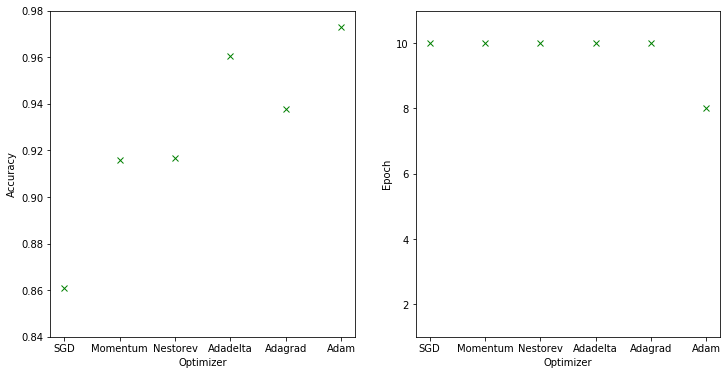

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(optimname,list(valacc.values()),'gx')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.ylim(0.84,0.98)
plt.subplot(1,2,2)
plt.plot(optimname,list(valepo.values()),'gx')
plt.xlabel('Optimizer')
plt.ylabel('Epoch')
plt.ylim(1,11)

In [30]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

101770

Adam optimizer is selected. Other optimizers performance maybe improved by tweaking the parameters but with default setting Adam performed best, also due to limitation of 10 epochs we will continue with it.

#### Tweaking learning rate

In [31]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valacc={}
valepo={}
learn=[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.25,0.2,0.15,0.1,0.095,0.09,0.085,0.08,0.075,0.07,0.065,0.06,0.055,0.05,0.045,0.04,0.035,0.03,0.025,0.02,0.015,0.01,0.005,0.001,0.00095,0.0009,0.00085,0.0008,0.00075,0.0007,0.00065,0.0006,0.00055,0.0005,0.00045,0.0004 ,0.00035,0.0003 ,0.00025,0.0002 ,0.00015,0.0001]
for f in learn:
    model.apply(weights_init)
    optimizer=optim.Adam(model.parameters(),lr=f)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))

        print("Learning rate: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
        
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Learning rate: 1. Epoch: 1/10.  Training Loss: 3.808.  Validation Loss: 2.570.  Validation Accuracy: 0.540
Learning rate: 1. Epoch: 2/10.  Training Loss: 2.445.  Validation Loss: 2.021.  Validation Accuracy: 0.677
Learning rate: 1. Epoch: 3/10.  Training Loss: 2.111.  Validation Loss: 2.808.  Validation Accuracy: 0.580
Learning rate: 1. Epoch: 4/10.  Training Loss: 1.934.  Validation Loss: 1.734.  Validation Accuracy: 0.654
Learning rate: 1. Epoch: 5/10.  Training Loss: 2.366.  Validation Loss: 2.574.  Validation Accuracy: 0.548
Learning rate: 1. Epoch: 6/10.  Training Loss: 2.787.  Validation Loss: 5.549.  Validation Accuracy: 0.510
Learning rate: 1. Epoch: 7/10.  Training Loss: 2.030.  Validation Loss: 2.138.  Validation Accuracy: 0.568
Learning rate: 1. Epoch: 8/10.  Training Loss: 1.880.  Validation Loss: 1.813.  Validation Accuracy: 0.672
Learning rate: 1. Epoch: 9/10.  Training Loss: 1.713.  Validation Loss: 1.141.  Validation Accuracy: 0.752
Learning rate: 1. Epoch: 10/10.  Trai

Learning rate: 0.085. Epoch: 10/10.  Training Loss: 0.301.  Validation Loss: 0.377.  Validation Accuracy: 0.903
Learning rate: 0.08. Epoch: 1/10.  Training Loss: 0.487.  Validation Loss: 0.345.  Validation Accuracy: 0.892
Learning rate: 0.08. Epoch: 2/10.  Training Loss: 0.334.  Validation Loss: 0.373.  Validation Accuracy: 0.892
Learning rate: 0.08. Epoch: 3/10.  Training Loss: 0.330.  Validation Loss: 0.308.  Validation Accuracy: 0.915
Learning rate: 0.08. Epoch: 4/10.  Training Loss: 0.311.  Validation Loss: 0.321.  Validation Accuracy: 0.908
Learning rate: 0.08. Epoch: 5/10.  Training Loss: 0.305.  Validation Loss: 0.285.  Validation Accuracy: 0.917
Learning rate: 0.08. Epoch: 6/10.  Training Loss: 0.276.  Validation Loss: 0.252.  Validation Accuracy: 0.932
Learning rate: 0.08. Epoch: 7/10.  Training Loss: 0.284.  Validation Loss: 0.327.  Validation Accuracy: 0.910
Learning rate: 0.08. Epoch: 8/10.  Training Loss: 0.274.  Validation Loss: 0.308.  Validation Accuracy: 0.916
Learning

Learning rate: 0.01. Epoch: 8/10.  Training Loss: 0.022.  Validation Loss: 0.132.  Validation Accuracy: 0.964
Learning rate: 0.01. Epoch: 9/10.  Training Loss: 0.021.  Validation Loss: 0.111.  Validation Accuracy: 0.969
Learning rate: 0.01. Epoch: 10/10.  Training Loss: 0.023.  Validation Loss: 0.118.  Validation Accuracy: 0.969
Learning rate: 0.005. Epoch: 1/10.  Training Loss: 0.384.  Validation Loss: 0.218.  Validation Accuracy: 0.938
Learning rate: 0.005. Epoch: 2/10.  Training Loss: 0.172.  Validation Loss: 0.161.  Validation Accuracy: 0.951
Learning rate: 0.005. Epoch: 3/10.  Training Loss: 0.120.  Validation Loss: 0.127.  Validation Accuracy: 0.962
Learning rate: 0.005. Epoch: 4/10.  Training Loss: 0.088.  Validation Loss: 0.119.  Validation Accuracy: 0.966
Learning rate: 0.005. Epoch: 5/10.  Training Loss: 0.067.  Validation Loss: 0.104.  Validation Accuracy: 0.968
Learning rate: 0.005. Epoch: 6/10.  Training Loss: 0.051.  Validation Loss: 0.100.  Validation Accuracy: 0.970
Lea

Learning rate: 0.00035. Epoch: 3/10.  Training Loss: 0.394.  Validation Loss: 0.366.  Validation Accuracy: 0.903
Learning rate: 0.00035. Epoch: 4/10.  Training Loss: 0.333.  Validation Loss: 0.322.  Validation Accuracy: 0.910
Learning rate: 0.00035. Epoch: 5/10.  Training Loss: 0.296.  Validation Loss: 0.293.  Validation Accuracy: 0.916
Learning rate: 0.00035. Epoch: 6/10.  Training Loss: 0.271.  Validation Loss: 0.271.  Validation Accuracy: 0.922
Learning rate: 0.00035. Epoch: 7/10.  Training Loss: 0.251.  Validation Loss: 0.254.  Validation Accuracy: 0.926
Learning rate: 0.00035. Epoch: 8/10.  Training Loss: 0.234.  Validation Loss: 0.240.  Validation Accuracy: 0.929
Learning rate: 0.00035. Epoch: 9/10.  Training Loss: 0.220.  Validation Loss: 0.228.  Validation Accuracy: 0.934
Learning rate: 0.00035. Epoch: 10/10.  Training Loss: 0.208.  Validation Loss: 0.217.  Validation Accuracy: 0.938
Learning rate: 0.0003. Epoch: 1/10.  Training Loss: 1.282.  Validation Loss: 0.749.  Validation

Text(0, 0.5, 'Epoch')

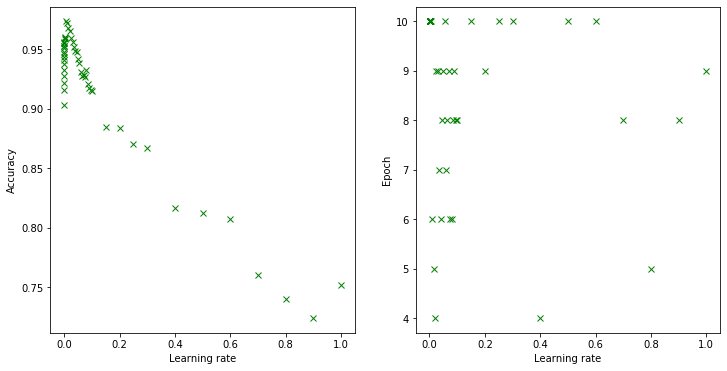

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(learn,list(valacc.values()),'gx')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(learn,list(valepo.values()),'gx')
plt.xlabel('Learning rate')
plt.ylabel('Epoch')

In [33]:
# Trying to narrow down the learning rate
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
lr=[]
valacc={}
valepo={}
learn=np.arange(0.03,0.001,-0.001)
for f in learn:
    model.apply(weights_init)
    lr.append(f)
    optimizer=optim.Adam(model.parameters(),lr=f)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1

        print("Learning rate: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Learning rate: 0.03. Epoch: 1/10.  Training Loss: 0.328.  Validation Loss: 0.200.  Validation Accuracy: 0.939
Learning rate: 0.03. Epoch: 2/10.  Training Loss: 0.167.  Validation Loss: 0.189.  Validation Accuracy: 0.941
Learning rate: 0.03. Epoch: 3/10.  Training Loss: 0.151.  Validation Loss: 0.180.  Validation Accuracy: 0.944
Learning rate: 0.03. Epoch: 4/10.  Training Loss: 0.137.  Validation Loss: 0.159.  Validation Accuracy: 0.954
Learning rate: 0.03. Epoch: 5/10.  Training Loss: 0.131.  Validation Loss: 0.186.  Validation Accuracy: 0.947
Learning rate: 0.03. Epoch: 6/10.  Training Loss: 0.120.  Validation Loss: 0.183.  Validation Accuracy: 0.946
Learning rate: 0.03. Epoch: 7/10.  Training Loss: 0.110.  Validation Loss: 0.174.  Validation Accuracy: 0.950
Learning rate: 0.03. Epoch: 8/10.  Training Loss: 0.103.  Validation Loss: 0.149.  Validation Accuracy: 0.958
Learning rate: 0.03. Epoch: 9/10.  Training Loss: 0.103.  Validation Loss: 0.158.  Validation Accuracy: 0.956
Learning r

Learning rate: 0.016999999999999987. Epoch: 2/10.  Training Loss: 0.130.  Validation Loss: 0.138.  Validation Accuracy: 0.958
Learning rate: 0.016999999999999987. Epoch: 3/10.  Training Loss: 0.093.  Validation Loss: 0.111.  Validation Accuracy: 0.967
Learning rate: 0.016999999999999987. Epoch: 4/10.  Training Loss: 0.073.  Validation Loss: 0.106.  Validation Accuracy: 0.969
Learning rate: 0.016999999999999987. Epoch: 5/10.  Training Loss: 0.064.  Validation Loss: 0.127.  Validation Accuracy: 0.964
Learning rate: 0.016999999999999987. Epoch: 6/10.  Training Loss: 0.054.  Validation Loss: 0.115.  Validation Accuracy: 0.968
Learning rate: 0.016999999999999987. Epoch: 7/10.  Training Loss: 0.050.  Validation Loss: 0.125.  Validation Accuracy: 0.965
Learning rate: 0.016999999999999987. Epoch: 8/10.  Training Loss: 0.048.  Validation Loss: 0.170.  Validation Accuracy: 0.952
Learning rate: 0.016999999999999987. Epoch: 9/10.  Training Loss: 0.050.  Validation Loss: 0.134.  Validation Accuracy

Learning rate: 0.003999999999999976. Epoch: 1/10.  Training Loss: 0.411.  Validation Loss: 0.232.  Validation Accuracy: 0.931
Learning rate: 0.003999999999999976. Epoch: 2/10.  Training Loss: 0.188.  Validation Loss: 0.169.  Validation Accuracy: 0.950
Learning rate: 0.003999999999999976. Epoch: 3/10.  Training Loss: 0.134.  Validation Loss: 0.150.  Validation Accuracy: 0.956
Learning rate: 0.003999999999999976. Epoch: 4/10.  Training Loss: 0.104.  Validation Loss: 0.129.  Validation Accuracy: 0.960
Learning rate: 0.003999999999999976. Epoch: 5/10.  Training Loss: 0.079.  Validation Loss: 0.118.  Validation Accuracy: 0.966
Learning rate: 0.003999999999999976. Epoch: 6/10.  Training Loss: 0.062.  Validation Loss: 0.105.  Validation Accuracy: 0.968
Learning rate: 0.003999999999999976. Epoch: 7/10.  Training Loss: 0.049.  Validation Loss: 0.098.  Validation Accuracy: 0.970
Learning rate: 0.003999999999999976. Epoch: 8/10.  Training Loss: 0.037.  Validation Loss: 0.098.  Validation Accuracy

Text(0, 0.5, 'Epoch')

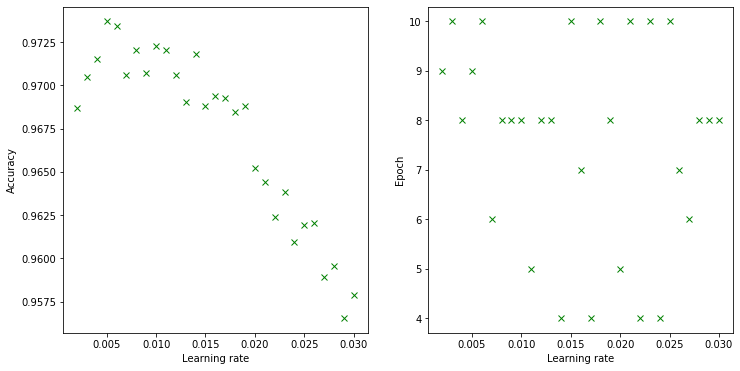

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(learn,list(valacc.values()),'gx')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(learn,list(valepo.values()),'gx')
plt.xlabel('Learning rate')
plt.ylabel('Epoch')

In [35]:
maxacc=0
bestlr=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestlr=i
        bestepo=valepo[i]
print(maxacc,bestlr,bestepo)

tensor(0.9737) 0.004999999999999977 9


In [36]:
# Number of parameters
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

101770

#### Tweaking batch size

In [37]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
batch=[32,64,96,128,160,192,224,256,352,512]
valacc={}
valepo={}
optimizer=optim.Adam(model.parameters(),lr=bestlr)
for f in batch:
    model.apply(weights_init)
    trainloader=torch.utils.data.DataLoader(train,batch_size = f,shuffle = True)
    valloader=torch.utils.data.DataLoader(val,batch_size = f,shuffle = True)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))

        print("Batch size: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
        
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Batch size: 32. Epoch: 1/10.  Training Loss: 0.293.  Validation Loss: 0.176.  Validation Accuracy: 0.948
Batch size: 32. Epoch: 2/10.  Training Loss: 0.134.  Validation Loss: 0.130.  Validation Accuracy: 0.959
Batch size: 32. Epoch: 3/10.  Training Loss: 0.089.  Validation Loss: 0.118.  Validation Accuracy: 0.963
Batch size: 32. Epoch: 4/10.  Training Loss: 0.066.  Validation Loss: 0.112.  Validation Accuracy: 0.966
Batch size: 32. Epoch: 5/10.  Training Loss: 0.050.  Validation Loss: 0.109.  Validation Accuracy: 0.967
Batch size: 32. Epoch: 6/10.  Training Loss: 0.039.  Validation Loss: 0.098.  Validation Accuracy: 0.973
Batch size: 32. Epoch: 7/10.  Training Loss: 0.031.  Validation Loss: 0.105.  Validation Accuracy: 0.970
Batch size: 32. Epoch: 8/10.  Training Loss: 0.026.  Validation Loss: 0.108.  Validation Accuracy: 0.972
Batch size: 32. Epoch: 9/10.  Training Loss: 0.022.  Validation Loss: 0.111.  Validation Accuracy: 0.969
Batch size: 32. Epoch: 10/10.  Training Loss: 0.017.  V

Text(0, 0.5, 'Epoch')

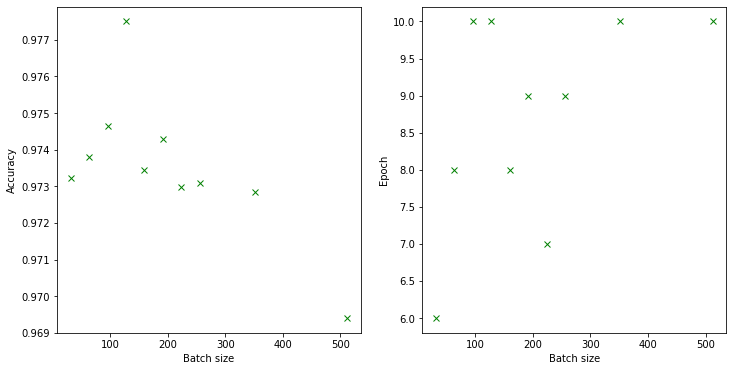

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(batch,list(valacc.values()),'gx')
plt.xlabel('Batch size')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(batch,list(valepo.values()),'gx')
plt.xlabel('Batch size')
plt.ylabel('Epoch')

In [39]:
maxacc=0
bestbatch=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestbatch=i
        bestepo=valepo[i]
print(maxacc,bestbatch,bestepo)

tensor(0.9775) 128 10


In [40]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

101770

Batch size of 128 is selected.

#### Tweaking number of hidden units

In [165]:
# Creating a new loader with previously obtained best batch size
trainloader=torch.utils.data.DataLoader(train,batch_size=bestbatch,shuffle=True)
valloader=torch.utils.data.DataLoader(val,batch_size=bestbatch,shuffle=True)

In [42]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
hiddenunits=np.arange(2,301,2).tolist()
valacc={}
valepo={}
for f in hiddenunits:
    class ffn(nn.Module):
        def __init__(self):
            super().__init__()
            self.hidden = nn.Linear(784, f)
            self.output = nn.Linear(f, 10)
        def forward(self, x):
            x = F.sigmoid(self.hidden(x))
            x = F.log_softmax(self.output(x), dim=1)
            return x
    model=ffn()
    model.cuda()
    model.apply(weights_init)
    optimizer=optim.Adam(model.parameters(),lr=bestlr)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
            
        print("Number of hidden units: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Number of hidden units: 2. Epoch: 1/10.  Training Loss: 1.941.  Validation Loss: 1.724.  Validation Accuracy: 0.372
Number of hidden units: 2. Epoch: 2/10.  Training Loss: 1.620.  Validation Loss: 1.546.  Validation Accuracy: 0.411
Number of hidden units: 2. Epoch: 3/10.  Training Loss: 1.501.  Validation Loss: 1.472.  Validation Accuracy: 0.415
Number of hidden units: 2. Epoch: 4/10.  Training Loss: 1.444.  Validation Loss: 1.431.  Validation Accuracy: 0.430
Number of hidden units: 2. Epoch: 5/10.  Training Loss: 1.405.  Validation Loss: 1.405.  Validation Accuracy: 0.445
Number of hidden units: 2. Epoch: 6/10.  Training Loss: 1.376.  Validation Loss: 1.377.  Validation Accuracy: 0.458
Number of hidden units: 2. Epoch: 7/10.  Training Loss: 1.348.  Validation Loss: 1.351.  Validation Accuracy: 0.470
Number of hidden units: 2. Epoch: 8/10.  Training Loss: 1.325.  Validation Loss: 1.325.  Validation Accuracy: 0.480
Number of hidden units: 2. Epoch: 9/10.  Training Loss: 1.297.  Validati

Number of hidden units: 28. Epoch: 10/10.  Training Loss: 0.103.  Validation Loss: 0.170.  Validation Accuracy: 0.952
Number of hidden units: 30. Epoch: 1/10.  Training Loss: 0.625.  Validation Loss: 0.315.  Validation Accuracy: 0.911
Number of hidden units: 30. Epoch: 2/10.  Training Loss: 0.264.  Validation Loss: 0.247.  Validation Accuracy: 0.928
Number of hidden units: 30. Epoch: 3/10.  Training Loss: 0.208.  Validation Loss: 0.212.  Validation Accuracy: 0.938
Number of hidden units: 30. Epoch: 4/10.  Training Loss: 0.176.  Validation Loss: 0.188.  Validation Accuracy: 0.946
Number of hidden units: 30. Epoch: 5/10.  Training Loss: 0.153.  Validation Loss: 0.175.  Validation Accuracy: 0.949
Number of hidden units: 30. Epoch: 6/10.  Training Loss: 0.136.  Validation Loss: 0.167.  Validation Accuracy: 0.952
Number of hidden units: 30. Epoch: 7/10.  Training Loss: 0.122.  Validation Loss: 0.160.  Validation Accuracy: 0.953
Number of hidden units: 30. Epoch: 8/10.  Training Loss: 0.110.

Number of hidden units: 56. Epoch: 8/10.  Training Loss: 0.070.  Validation Loss: 0.124.  Validation Accuracy: 0.963
Number of hidden units: 56. Epoch: 9/10.  Training Loss: 0.060.  Validation Loss: 0.126.  Validation Accuracy: 0.963
Number of hidden units: 56. Epoch: 10/10.  Training Loss: 0.052.  Validation Loss: 0.120.  Validation Accuracy: 0.962
Number of hidden units: 58. Epoch: 1/10.  Training Loss: 0.520.  Validation Loss: 0.265.  Validation Accuracy: 0.925
Number of hidden units: 58. Epoch: 2/10.  Training Loss: 0.223.  Validation Loss: 0.204.  Validation Accuracy: 0.940
Number of hidden units: 58. Epoch: 3/10.  Training Loss: 0.168.  Validation Loss: 0.169.  Validation Accuracy: 0.952
Number of hidden units: 58. Epoch: 4/10.  Training Loss: 0.136.  Validation Loss: 0.149.  Validation Accuracy: 0.956
Number of hidden units: 58. Epoch: 5/10.  Training Loss: 0.114.  Validation Loss: 0.143.  Validation Accuracy: 0.957
Number of hidden units: 58. Epoch: 6/10.  Training Loss: 0.095.

Number of hidden units: 84. Epoch: 6/10.  Training Loss: 0.077.  Validation Loss: 0.115.  Validation Accuracy: 0.966
Number of hidden units: 84. Epoch: 7/10.  Training Loss: 0.063.  Validation Loss: 0.106.  Validation Accuracy: 0.969
Number of hidden units: 84. Epoch: 8/10.  Training Loss: 0.051.  Validation Loss: 0.102.  Validation Accuracy: 0.970
Number of hidden units: 84. Epoch: 9/10.  Training Loss: 0.041.  Validation Loss: 0.105.  Validation Accuracy: 0.969
Number of hidden units: 84. Epoch: 10/10.  Training Loss: 0.035.  Validation Loss: 0.103.  Validation Accuracy: 0.970
Number of hidden units: 86. Epoch: 1/10.  Training Loss: 0.469.  Validation Loss: 0.251.  Validation Accuracy: 0.927
Number of hidden units: 86. Epoch: 2/10.  Training Loss: 0.201.  Validation Loss: 0.175.  Validation Accuracy: 0.949
Number of hidden units: 86. Epoch: 3/10.  Training Loss: 0.149.  Validation Loss: 0.149.  Validation Accuracy: 0.954
Number of hidden units: 86. Epoch: 4/10.  Training Loss: 0.116.

Number of hidden units: 112. Epoch: 4/10.  Training Loss: 0.105.  Validation Loss: 0.132.  Validation Accuracy: 0.961
Number of hidden units: 112. Epoch: 5/10.  Training Loss: 0.082.  Validation Loss: 0.116.  Validation Accuracy: 0.965
Number of hidden units: 112. Epoch: 6/10.  Training Loss: 0.063.  Validation Loss: 0.110.  Validation Accuracy: 0.968
Number of hidden units: 112. Epoch: 7/10.  Training Loss: 0.050.  Validation Loss: 0.101.  Validation Accuracy: 0.970
Number of hidden units: 112. Epoch: 8/10.  Training Loss: 0.039.  Validation Loss: 0.104.  Validation Accuracy: 0.971
Number of hidden units: 112. Epoch: 9/10.  Training Loss: 0.032.  Validation Loss: 0.102.  Validation Accuracy: 0.970
Number of hidden units: 112. Epoch: 10/10.  Training Loss: 0.024.  Validation Loss: 0.099.  Validation Accuracy: 0.971
Number of hidden units: 114. Epoch: 1/10.  Training Loss: 0.422.  Validation Loss: 0.235.  Validation Accuracy: 0.931
Number of hidden units: 114. Epoch: 2/10.  Training Los

Number of hidden units: 140. Epoch: 2/10.  Training Loss: 0.192.  Validation Loss: 0.171.  Validation Accuracy: 0.950
Number of hidden units: 140. Epoch: 3/10.  Training Loss: 0.135.  Validation Loss: 0.137.  Validation Accuracy: 0.960
Number of hidden units: 140. Epoch: 4/10.  Training Loss: 0.102.  Validation Loss: 0.122.  Validation Accuracy: 0.965
Number of hidden units: 140. Epoch: 5/10.  Training Loss: 0.077.  Validation Loss: 0.111.  Validation Accuracy: 0.966
Number of hidden units: 140. Epoch: 6/10.  Training Loss: 0.060.  Validation Loss: 0.107.  Validation Accuracy: 0.969
Number of hidden units: 140. Epoch: 7/10.  Training Loss: 0.048.  Validation Loss: 0.106.  Validation Accuracy: 0.969
Number of hidden units: 140. Epoch: 8/10.  Training Loss: 0.036.  Validation Loss: 0.096.  Validation Accuracy: 0.972
Number of hidden units: 140. Epoch: 9/10.  Training Loss: 0.027.  Validation Loss: 0.093.  Validation Accuracy: 0.972
Number of hidden units: 140. Epoch: 10/10.  Training Los

Number of hidden units: 166. Epoch: 10/10.  Training Loss: 0.016.  Validation Loss: 0.096.  Validation Accuracy: 0.973
Number of hidden units: 168. Epoch: 1/10.  Training Loss: 0.393.  Validation Loss: 0.220.  Validation Accuracy: 0.935
Number of hidden units: 168. Epoch: 2/10.  Training Loss: 0.182.  Validation Loss: 0.163.  Validation Accuracy: 0.952
Number of hidden units: 168. Epoch: 3/10.  Training Loss: 0.127.  Validation Loss: 0.143.  Validation Accuracy: 0.956
Number of hidden units: 168. Epoch: 4/10.  Training Loss: 0.095.  Validation Loss: 0.112.  Validation Accuracy: 0.966
Number of hidden units: 168. Epoch: 5/10.  Training Loss: 0.069.  Validation Loss: 0.101.  Validation Accuracy: 0.970
Number of hidden units: 168. Epoch: 6/10.  Training Loss: 0.053.  Validation Loss: 0.100.  Validation Accuracy: 0.971
Number of hidden units: 168. Epoch: 7/10.  Training Loss: 0.040.  Validation Loss: 0.102.  Validation Accuracy: 0.971
Number of hidden units: 168. Epoch: 8/10.  Training Los

Number of hidden units: 194. Epoch: 8/10.  Training Loss: 0.029.  Validation Loss: 0.103.  Validation Accuracy: 0.969
Number of hidden units: 194. Epoch: 9/10.  Training Loss: 0.021.  Validation Loss: 0.093.  Validation Accuracy: 0.974
Number of hidden units: 194. Epoch: 10/10.  Training Loss: 0.015.  Validation Loss: 0.090.  Validation Accuracy: 0.975
Number of hidden units: 196. Epoch: 1/10.  Training Loss: 0.392.  Validation Loss: 0.229.  Validation Accuracy: 0.933
Number of hidden units: 196. Epoch: 2/10.  Training Loss: 0.184.  Validation Loss: 0.163.  Validation Accuracy: 0.952
Number of hidden units: 196. Epoch: 3/10.  Training Loss: 0.128.  Validation Loss: 0.131.  Validation Accuracy: 0.962
Number of hidden units: 196. Epoch: 4/10.  Training Loss: 0.093.  Validation Loss: 0.114.  Validation Accuracy: 0.965
Number of hidden units: 196. Epoch: 5/10.  Training Loss: 0.069.  Validation Loss: 0.106.  Validation Accuracy: 0.969
Number of hidden units: 196. Epoch: 6/10.  Training Los

Number of hidden units: 222. Epoch: 6/10.  Training Loss: 0.048.  Validation Loss: 0.096.  Validation Accuracy: 0.973
Number of hidden units: 222. Epoch: 7/10.  Training Loss: 0.035.  Validation Loss: 0.101.  Validation Accuracy: 0.972
Number of hidden units: 222. Epoch: 8/10.  Training Loss: 0.025.  Validation Loss: 0.089.  Validation Accuracy: 0.974
Number of hidden units: 222. Epoch: 9/10.  Training Loss: 0.017.  Validation Loss: 0.087.  Validation Accuracy: 0.975
Number of hidden units: 222. Epoch: 10/10.  Training Loss: 0.013.  Validation Loss: 0.092.  Validation Accuracy: 0.975
Number of hidden units: 224. Epoch: 1/10.  Training Loss: 0.396.  Validation Loss: 0.225.  Validation Accuracy: 0.933
Number of hidden units: 224. Epoch: 2/10.  Training Loss: 0.183.  Validation Loss: 0.159.  Validation Accuracy: 0.953
Number of hidden units: 224. Epoch: 3/10.  Training Loss: 0.124.  Validation Loss: 0.132.  Validation Accuracy: 0.961
Number of hidden units: 224. Epoch: 4/10.  Training Los

Number of hidden units: 250. Epoch: 4/10.  Training Loss: 0.085.  Validation Loss: 0.107.  Validation Accuracy: 0.969
Number of hidden units: 250. Epoch: 5/10.  Training Loss: 0.061.  Validation Loss: 0.096.  Validation Accuracy: 0.971
Number of hidden units: 250. Epoch: 6/10.  Training Loss: 0.046.  Validation Loss: 0.096.  Validation Accuracy: 0.970
Number of hidden units: 250. Epoch: 7/10.  Training Loss: 0.031.  Validation Loss: 0.092.  Validation Accuracy: 0.974
Number of hidden units: 250. Epoch: 8/10.  Training Loss: 0.023.  Validation Loss: 0.092.  Validation Accuracy: 0.972
Number of hidden units: 250. Epoch: 9/10.  Training Loss: 0.016.  Validation Loss: 0.091.  Validation Accuracy: 0.973
Number of hidden units: 250. Epoch: 10/10.  Training Loss: 0.011.  Validation Loss: 0.089.  Validation Accuracy: 0.977
Number of hidden units: 252. Epoch: 1/10.  Training Loss: 0.372.  Validation Loss: 0.214.  Validation Accuracy: 0.936
Number of hidden units: 252. Epoch: 2/10.  Training Los

Number of hidden units: 278. Epoch: 2/10.  Training Loss: 0.177.  Validation Loss: 0.157.  Validation Accuracy: 0.953
Number of hidden units: 278. Epoch: 3/10.  Training Loss: 0.117.  Validation Loss: 0.126.  Validation Accuracy: 0.965
Number of hidden units: 278. Epoch: 4/10.  Training Loss: 0.084.  Validation Loss: 0.110.  Validation Accuracy: 0.967
Number of hidden units: 278. Epoch: 5/10.  Training Loss: 0.061.  Validation Loss: 0.095.  Validation Accuracy: 0.971
Number of hidden units: 278. Epoch: 6/10.  Training Loss: 0.045.  Validation Loss: 0.090.  Validation Accuracy: 0.972
Number of hidden units: 278. Epoch: 7/10.  Training Loss: 0.030.  Validation Loss: 0.103.  Validation Accuracy: 0.970
Number of hidden units: 278. Epoch: 8/10.  Training Loss: 0.022.  Validation Loss: 0.086.  Validation Accuracy: 0.974
Number of hidden units: 278. Epoch: 9/10.  Training Loss: 0.015.  Validation Loss: 0.086.  Validation Accuracy: 0.975
Number of hidden units: 278. Epoch: 10/10.  Training Los

Text(0, 0.5, 'Epoch')

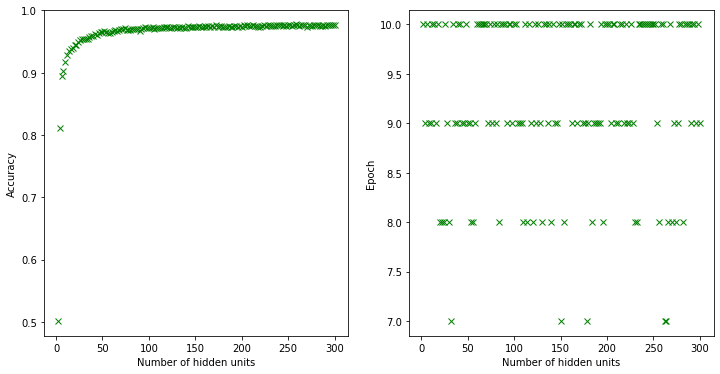

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(hiddenunits,list(valacc.values()),'gx')
plt.xlabel('Number of hidden units')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(hiddenunits,list(valepo.values()),'gx')
plt.xlabel('Number of hidden units')
plt.ylabel('Epoch')

In [44]:
maxacc=0
bestunits=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestunits=i
        bestepo=valepo[i]
print(maxacc,bestunits,bestepo)

tensor(0.9773) 258 10


In [45]:
valacc[50]

tensor(0.9650)

In [46]:
print(valacc[74],valacc[76],valacc[78],valacc[80])

tensor(0.9713) tensor(0.9688) tensor(0.9692) tensor(0.9677)


In [47]:
valacc[100]

tensor(0.9708)

In [48]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

238510

Select 75,100 and 258 hidden units.

#### Activation function

In [49]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
activate=['Sigmoid','Tanh','Relu','Lrelu']
valepo={}
valacc={}
for f in activate:
    class ffn(nn.Module):
        def __init__(self):
            super().__init__()
            self.hidden = nn.Linear(784, 75)
            self.output = nn.Linear(75, 10)
        def forward(self, x):
            if f=='Sigmoid':
                x = F.sigmoid(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            elif f=='Tanh':
                x = F.tanh(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            elif f=='Relu':
                x = F.relu(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            elif f=='Lrelu':
                x = F.leaky_relu(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            return x
    model=ffn()
    model.cuda()
    model.apply(weights_init)
    optimizer=optim.Adam(model.parameters(),lr=bestlr)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
                
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))

        print("Activation: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Activation: Sigmoid. Epoch: 1/10.  Training Loss: 0.468.  Validation Loss: 0.255.  Validation Accuracy: 0.927
Activation: Sigmoid. Epoch: 2/10.  Training Loss: 0.209.  Validation Loss: 0.201.  Validation Accuracy: 0.938
Activation: Sigmoid. Epoch: 3/10.  Training Loss: 0.154.  Validation Loss: 0.153.  Validation Accuracy: 0.957
Activation: Sigmoid. Epoch: 4/10.  Training Loss: 0.120.  Validation Loss: 0.135.  Validation Accuracy: 0.961
Activation: Sigmoid. Epoch: 5/10.  Training Loss: 0.098.  Validation Loss: 0.136.  Validation Accuracy: 0.960
Activation: Sigmoid. Epoch: 6/10.  Training Loss: 0.080.  Validation Loss: 0.117.  Validation Accuracy: 0.965
Activation: Sigmoid. Epoch: 7/10.  Training Loss: 0.066.  Validation Loss: 0.113.  Validation Accuracy: 0.966
Activation: Sigmoid. Epoch: 8/10.  Training Loss: 0.056.  Validation Loss: 0.112.  Validation Accuracy: 0.965
Activation: Sigmoid. Epoch: 9/10.  Training Loss: 0.044.  Validation Loss: 0.107.  Validation Accuracy: 0.968
Activation

D:\Software\Anaconda\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Activation: Tanh. Epoch: 1/10.  Training Loss: 0.321.  Validation Loss: 0.197.  Validation Accuracy: 0.943
Activation: Tanh. Epoch: 2/10.  Training Loss: 0.157.  Validation Loss: 0.147.  Validation Accuracy: 0.959
Activation: Tanh. Epoch: 3/10.  Training Loss: 0.107.  Validation Loss: 0.125.  Validation Accuracy: 0.966
Activation: Tanh. Epoch: 4/10.  Training Loss: 0.081.  Validation Loss: 0.119.  Validation Accuracy: 0.966
Activation: Tanh. Epoch: 5/10.  Training Loss: 0.063.  Validation Loss: 0.119.  Validation Accuracy: 0.965
Activation: Tanh. Epoch: 6/10.  Training Loss: 0.049.  Validation Loss: 0.115.  Validation Accuracy: 0.967
Activation: Tanh. Epoch: 7/10.  Training Loss: 0.039.  Validation Loss: 0.114.  Validation Accuracy: 0.970
Activation: Tanh. Epoch: 8/10.  Training Loss: 0.031.  Validation Loss: 0.111.  Validation Accuracy: 0.969
Activation: Tanh. Epoch: 9/10.  Training Loss: 0.026.  Validation Loss: 0.115.  Validation Accuracy: 0.968
Activation: Tanh. Epoch: 10/10.  Trai

Text(0, 0.5, 'Epoch')

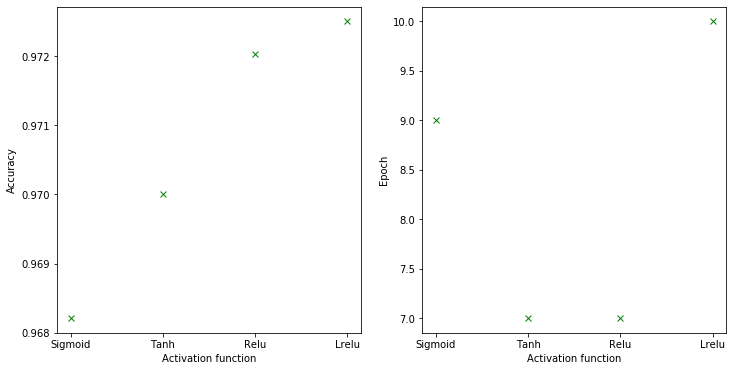

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(activate,list(valacc.values()),'gx')
plt.xlabel('Activation function')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(activate,list(valepo.values()),'gx')
plt.xlabel('Activation function')
plt.ylabel('Epoch')

In [51]:
maxacc=0
bestact=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestact=i
        bestepo=valepo[i]
print(maxacc,bestact,bestepo)

tensor(0.9725) Lrelu 10


In [52]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

59635

In [53]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
activate=['Sigmoid','Tanh','Relu','Lrelu']
valepo={}
valacc={}
for f in activate:
    class ffn(nn.Module):
        def __init__(self):
            super().__init__()
            self.hidden = nn.Linear(784, 100)
            self.output = nn.Linear(100, 10)
        def forward(self, x):
            if f=='Sigmoid':
                x = F.sigmoid(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            if f=='Tanh':
                x = F.tanh(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            if f=='Relu':
                x = F.relu(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            if f=='Lrelu':
                x = F.leaky_relu(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            return x
    model=ffn()
    model.cuda()
    model.apply(weights_init)
    optimizer=optim.Adam(model.parameters(),lr=bestlr)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
                
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))

        print("Activation: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Activation: Sigmoid. Epoch: 1/10.  Training Loss: 0.433.  Validation Loss: 0.241.  Validation Accuracy: 0.931
Activation: Sigmoid. Epoch: 2/10.  Training Loss: 0.198.  Validation Loss: 0.179.  Validation Accuracy: 0.947
Activation: Sigmoid. Epoch: 3/10.  Training Loss: 0.145.  Validation Loss: 0.144.  Validation Accuracy: 0.958
Activation: Sigmoid. Epoch: 4/10.  Training Loss: 0.109.  Validation Loss: 0.132.  Validation Accuracy: 0.961
Activation: Sigmoid. Epoch: 5/10.  Training Loss: 0.085.  Validation Loss: 0.121.  Validation Accuracy: 0.965
Activation: Sigmoid. Epoch: 6/10.  Training Loss: 0.069.  Validation Loss: 0.120.  Validation Accuracy: 0.964
Activation: Sigmoid. Epoch: 7/10.  Training Loss: 0.055.  Validation Loss: 0.116.  Validation Accuracy: 0.967
Activation: Sigmoid. Epoch: 8/10.  Training Loss: 0.044.  Validation Loss: 0.099.  Validation Accuracy: 0.971
Activation: Sigmoid. Epoch: 9/10.  Training Loss: 0.036.  Validation Loss: 0.102.  Validation Accuracy: 0.970
Activation

Text(0, 0.5, 'Epoch')

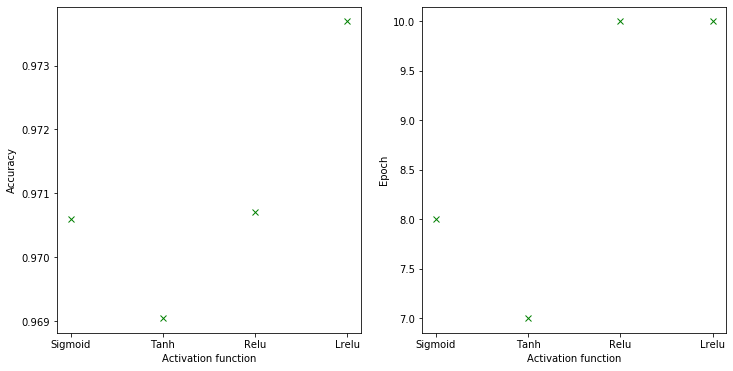

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(activate,list(valacc.values()),'gx')
plt.xlabel('Activation function')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(activate,list(valepo.values()),'gx')
plt.xlabel('Activation function')
plt.ylabel('Epoch')

In [55]:
maxacc=0
bestact=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestact=i
        bestepo=valepo[i]
print(maxacc,bestact,bestepo)

tensor(0.9737) Lrelu 10


In [56]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

79510

In [166]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
activate=['Sigmoid','Tanh','Relu','Lrelu']
valepo={}
valacc={}
for f in activate:
    class ffn(nn.Module):
        def __init__(self):
            super().__init__()
            self.hidden = nn.Linear(784, 258)
            self.output = nn.Linear(258, 10)
        def forward(self, x):
            if f=='Sigmoid':
                x = F.sigmoid(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            if f=='Tanh':
                x = F.tanh(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            if f=='Relu':
                x = F.relu(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            if f=='Lrelu':
                x = F.leaky_relu(self.hidden(x))
                x = F.log_softmax(self.output(x), dim=1)
            return x
    model=ffn()
    model.cuda()
    model.apply(weights_init)
    optimizer=optim.Adam(model.parameters(),lr=bestlr)
    acc=0
    for e in range(epochs):
        running_loss=0
        for images,labels in trainloader:
            optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
            log_ps=model(images) # Call our feed forward network
            loss=criterion(log_ps,labels) #Calculate the loss
            loss.backward() # Backpropagate to calculate gradient at each neuron
            optimizer.step() # Updating weights
            accloss=acccrit(log_ps,labels)
            running_loss+=accloss.item()
        
        val_loss=0
        correct=0
        
        with torch.no_grad():  #Disable gradient calculation
            model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
            for images,labels in valloader:
                log_ps=model(images)
                val_loss+=acccrit(log_ps,labels)
                ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
                top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
                equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
                correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
        if (correct/len(val))>acc:
            acc=(correct/len(val))
            epoch=e+1
                
        model.train() #Back to train mode
        train_losses.append(running_loss/len(train))
        val_losses.append(val_loss/len(val))

        print("Activation: {}.".format(f),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
    valacc[f]=acc
    valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

D:\Software\Anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Activation: Sigmoid. Epoch: 1/10.  Training Loss: 0.371.  Validation Loss: 0.218.  Validation Accuracy: 0.937
Activation: Sigmoid. Epoch: 2/10.  Training Loss: 0.178.  Validation Loss: 0.162.  Validation Accuracy: 0.951
Activation: Sigmoid. Epoch: 3/10.  Training Loss: 0.123.  Validation Loss: 0.123.  Validation Accuracy: 0.962
Activation: Sigmoid. Epoch: 4/10.  Training Loss: 0.087.  Validation Loss: 0.105.  Validation Accuracy: 0.968
Activation: Sigmoid. Epoch: 5/10.  Training Loss: 0.062.  Validation Loss: 0.098.  Validation Accuracy: 0.970
Activation: Sigmoid. Epoch: 6/10.  Training Loss: 0.046.  Validation Loss: 0.093.  Validation Accuracy: 0.972
Activation: Sigmoid. Epoch: 7/10.  Training Loss: 0.032.  Validation Loss: 0.095.  Validation Accuracy: 0.972
Activation: Sigmoid. Epoch: 8/10.  Training Loss: 0.023.  Validation Loss: 0.086.  Validation Accuracy: 0.974
Activation: Sigmoid. Epoch: 9/10.  Training Loss: 0.016.  Validation Loss: 0.093.  Validation Accuracy: 0.973
Activation

D:\Software\Anaconda\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Activation: Tanh. Epoch: 1/10.  Training Loss: 0.309.  Validation Loss: 0.194.  Validation Accuracy: 0.941
Activation: Tanh. Epoch: 2/10.  Training Loss: 0.139.  Validation Loss: 0.124.  Validation Accuracy: 0.962
Activation: Tanh. Epoch: 3/10.  Training Loss: 0.088.  Validation Loss: 0.110.  Validation Accuracy: 0.965
Activation: Tanh. Epoch: 4/10.  Training Loss: 0.061.  Validation Loss: 0.105.  Validation Accuracy: 0.966
Activation: Tanh. Epoch: 5/10.  Training Loss: 0.042.  Validation Loss: 0.094.  Validation Accuracy: 0.972
Activation: Tanh. Epoch: 6/10.  Training Loss: 0.029.  Validation Loss: 0.103.  Validation Accuracy: 0.969
Activation: Tanh. Epoch: 7/10.  Training Loss: 0.019.  Validation Loss: 0.098.  Validation Accuracy: 0.973
Activation: Tanh. Epoch: 8/10.  Training Loss: 0.020.  Validation Loss: 0.112.  Validation Accuracy: 0.969
Activation: Tanh. Epoch: 9/10.  Training Loss: 0.018.  Validation Loss: 0.105.  Validation Accuracy: 0.973
Activation: Tanh. Epoch: 10/10.  Trai

Text(0, 0.5, 'Epoch')

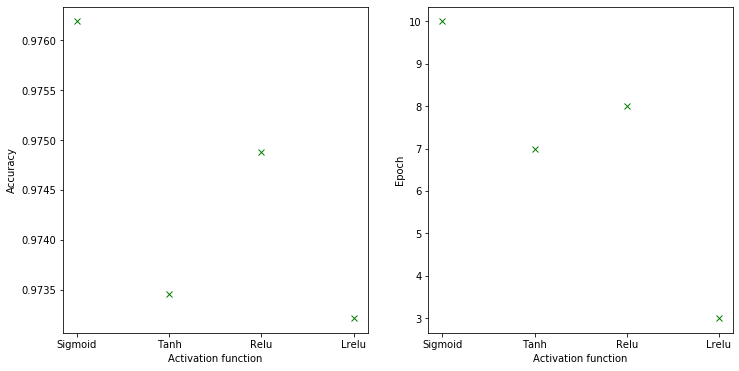

In [167]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(activate,list(valacc.values()),'gx')
plt.xlabel('Activation function')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(activate,list(valepo.values()),'gx')
plt.xlabel('Activation function')
plt.ylabel('Epoch')

In [168]:
maxacc=0
bestact=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestact=i
        bestepo=valepo[i]
print(maxacc,bestact,bestepo)

tensor(0.9762) Sigmoid 10


In [169]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

205120

#### Adding layers

In [57]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valepo={}
valacc={}
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 75)
        self.fc2 = nn.Linear(75,50)
        self.output = nn.Linear(50, 10)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()
model.apply(weights_init)
optimizer=optim.Adam(model.parameters(),lr=bestlr)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    val_loss=0
    correct=0
        
    with torch.no_grad():  #Disable gradient calculation
        model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
        for images,labels in valloader:
            log_ps=model(images)
            val_loss+=acccrit(log_ps,labels)
            ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
            top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
            equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
            correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
    if (correct/len(val))>acc:
        acc=(correct/len(val))
        epoch=e+1
                
    model.train() #Back to train mode
    train_losses.append(running_loss/len(train))
    val_losses.append(val_loss/len(val))

    print("Layers: {}.".format(2),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
valacc[f]=acc
valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Layers: 2. Epoch: 1/10.  Training Loss: 0.330.  Validation Loss: 0.184.  Validation Accuracy: 0.946
Layers: 2. Epoch: 2/10.  Training Loss: 0.141.  Validation Loss: 0.131.  Validation Accuracy: 0.960
Layers: 2. Epoch: 3/10.  Training Loss: 0.102.  Validation Loss: 0.123.  Validation Accuracy: 0.965
Layers: 2. Epoch: 4/10.  Training Loss: 0.080.  Validation Loss: 0.119.  Validation Accuracy: 0.965
Layers: 2. Epoch: 5/10.  Training Loss: 0.066.  Validation Loss: 0.134.  Validation Accuracy: 0.964
Layers: 2. Epoch: 6/10.  Training Loss: 0.058.  Validation Loss: 0.114.  Validation Accuracy: 0.968
Layers: 2. Epoch: 7/10.  Training Loss: 0.045.  Validation Loss: 0.110.  Validation Accuracy: 0.971
Layers: 2. Epoch: 8/10.  Training Loss: 0.041.  Validation Loss: 0.131.  Validation Accuracy: 0.967
Layers: 2. Epoch: 9/10.  Training Loss: 0.042.  Validation Loss: 0.125.  Validation Accuracy: 0.967
Layers: 2. Epoch: 10/10.  Training Loss: 0.035.  Validation Loss: 0.158.  Validation Accuracy: 0.965

In [58]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

63185

We can see that while train loss decreases the test loss keeps increasing which is a sign of overfitting. By increasing the layers we are leading to overfitting. This was also visible in single layer networks but here the loss has been fluctuating right from 5th epoch. Lets try to reduce the neurons in the layers.

In [59]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valepo={}
valacc={}
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 40)
        self.fc2 = nn.Linear(40,20)
        self.output = nn.Linear(20, 10)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()
model.apply(weights_init)
optimizer=optim.Adam(model.parameters(),lr=bestlr)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    val_loss=0
    correct=0
        
    with torch.no_grad():  #Disable gradient calculation
        model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
        for images,labels in valloader:
            log_ps=model(images)
            val_loss+=acccrit(log_ps,labels)
            ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
            top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
            equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
            correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
    if (correct/len(val))>acc:
        acc=(correct/len(val))
        epoch=e+1
                
    model.train() #Back to train mode
    train_losses.append(running_loss/len(train))
    val_losses.append(val_loss/len(val))

    print("Layers: {}.".format(2),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
valacc[f]=acc
valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Layers: 2. Epoch: 1/10.  Training Loss: 0.405.  Validation Loss: 0.242.  Validation Accuracy: 0.929
Layers: 2. Epoch: 2/10.  Training Loss: 0.183.  Validation Loss: 0.193.  Validation Accuracy: 0.942
Layers: 2. Epoch: 3/10.  Training Loss: 0.140.  Validation Loss: 0.150.  Validation Accuracy: 0.958
Layers: 2. Epoch: 4/10.  Training Loss: 0.115.  Validation Loss: 0.142.  Validation Accuracy: 0.959
Layers: 2. Epoch: 5/10.  Training Loss: 0.095.  Validation Loss: 0.147.  Validation Accuracy: 0.960
Layers: 2. Epoch: 6/10.  Training Loss: 0.082.  Validation Loss: 0.156.  Validation Accuracy: 0.959
Layers: 2. Epoch: 7/10.  Training Loss: 0.073.  Validation Loss: 0.150.  Validation Accuracy: 0.958
Layers: 2. Epoch: 8/10.  Training Loss: 0.064.  Validation Loss: 0.143.  Validation Accuracy: 0.962
Layers: 2. Epoch: 9/10.  Training Loss: 0.056.  Validation Loss: 0.146.  Validation Accuracy: 0.962
Layers: 2. Epoch: 10/10.  Training Loss: 0.055.  Validation Loss: 0.133.  Validation Accuracy: 0.964

In [60]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

32430

In [61]:
maxacc=0
bestact=0
for i in valacc:
    if valacc[i]>maxacc:
        maxacc=valacc[i]
        bestepo=valepo[i]
print(maxacc,bestepo)

tensor(0.9639) 10


The accuracy is not as good as single layer with 75 neurons but has overall lesser parameters.

In [78]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valepo={}
valacc={}
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 70)
        self.fc2 = nn.Linear(70,35)
        self.output = nn.Linear(35, 10)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()
model.apply(weights_init)
optimizer=optim.Adam(model.parameters(),lr=bestlr)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    val_loss=0
    correct=0
        
    with torch.no_grad():  #Disable gradient calculation
        model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
        for images,labels in valloader:
            log_ps=model(images)
            val_loss+=acccrit(log_ps,labels)
            ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
            top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
            equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
            correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
    if (correct/len(val))>acc:
        acc=(correct/len(val))
        epoch=e+1
                
    model.train() #Back to train mode
    train_losses.append(running_loss/len(train))
    val_losses.append(val_loss/len(val))

    print("Layers: {}.".format(2),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
valacc[f]=acc
valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Layers: 2. Epoch: 1/10.  Training Loss: 0.340.  Validation Loss: 0.193.  Validation Accuracy: 0.942
Layers: 2. Epoch: 2/10.  Training Loss: 0.150.  Validation Loss: 0.143.  Validation Accuracy: 0.957
Layers: 2. Epoch: 3/10.  Training Loss: 0.108.  Validation Loss: 0.133.  Validation Accuracy: 0.962
Layers: 2. Epoch: 4/10.  Training Loss: 0.086.  Validation Loss: 0.126.  Validation Accuracy: 0.963
Layers: 2. Epoch: 5/10.  Training Loss: 0.070.  Validation Loss: 0.132.  Validation Accuracy: 0.962
Layers: 2. Epoch: 6/10.  Training Loss: 0.062.  Validation Loss: 0.149.  Validation Accuracy: 0.957
Layers: 2. Epoch: 7/10.  Training Loss: 0.048.  Validation Loss: 0.175.  Validation Accuracy: 0.953
Layers: 2. Epoch: 8/10.  Training Loss: 0.048.  Validation Loss: 0.137.  Validation Accuracy: 0.965
Layers: 2. Epoch: 9/10.  Training Loss: 0.040.  Validation Loss: 0.128.  Validation Accuracy: 0.969
Layers: 2. Epoch: 10/10.  Training Loss: 0.040.  Validation Loss: 0.140.  Validation Accuracy: 0.968

In [79]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

57795

0.969 accuracy is better but still a single layer with leaky relu is giving 0.974 for slightly higher number of parameters.

In [80]:
# Adding an additional layer
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valepo={}
valacc={}
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50,40)
        self.fc3 = nn.Linear(40,30)
        self.output = nn.Linear(30, 10)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()
model.apply(weights_init)
optimizer=optim.Adam(model.parameters(),lr=bestlr)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    val_loss=0
    correct=0
        
    with torch.no_grad():  #Disable gradient calculation
        model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
        for images,labels in valloader:
            log_ps=model(images)
            val_loss+=acccrit(log_ps,labels)
            ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
            top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
            equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
            correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
    if (correct/len(val))>acc:
        acc=(correct/len(val))
        epoch=e+1
                
    model.train() #Back to train mode
    train_losses.append(running_loss/len(train))
    val_losses.append(val_loss/len(val))

    print("Layers: {}.".format(2),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Validation Loss: {:.3f}. ".format(val_loss/len(val)),
              "Validation Accuracy: {:.3f}".format(correct/len(val)))   
    
valacc[f]=acc
valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Layers: 2. Epoch: 1/10.  Training Loss: 0.361.  Validation Loss: 0.190.  Validation Accuracy: 0.943
Layers: 2. Epoch: 2/10.  Training Loss: 0.160.  Validation Loss: 0.159.  Validation Accuracy: 0.952
Layers: 2. Epoch: 3/10.  Training Loss: 0.118.  Validation Loss: 0.146.  Validation Accuracy: 0.956
Layers: 2. Epoch: 4/10.  Training Loss: 0.097.  Validation Loss: 0.130.  Validation Accuracy: 0.964
Layers: 2. Epoch: 5/10.  Training Loss: 0.083.  Validation Loss: 0.116.  Validation Accuracy: 0.967
Layers: 2. Epoch: 6/10.  Training Loss: 0.072.  Validation Loss: 0.127.  Validation Accuracy: 0.964
Layers: 2. Epoch: 7/10.  Training Loss: 0.064.  Validation Loss: 0.133.  Validation Accuracy: 0.964
Layers: 2. Epoch: 8/10.  Training Loss: 0.054.  Validation Loss: 0.150.  Validation Accuracy: 0.960
Layers: 2. Epoch: 9/10.  Training Loss: 0.052.  Validation Loss: 0.115.  Validation Accuracy: 0.969
Layers: 2. Epoch: 10/10.  Training Loss: 0.046.  Validation Loss: 0.192.  Validation Accuracy: 0.954

In [81]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

42830

In [82]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses,val_losses=[],[]
optimwt=[]
valepo={}
valacc={}
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 45)
        self.fc2 = nn.Linear(45,45)
        self.fc3 = nn.Linear(45,45)
        self.fc4 = nn.Linear(45,45)
        self.fc5 = nn.Linear(45,45)
        self.fc6 = nn.Linear(45,45)
        self.fc7 = nn.Linear(45,45)
        self.output = nn.Linear(45, 10)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.leaky_relu(self.fc4(x))
        x = F.leaky_relu(self.fc5(x))
        x = F.leaky_relu(self.fc6(x))
        x = F.leaky_relu(self.fc7(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()
model.apply(weights_init)
optimizer=optim.Adam(model.parameters(),lr=bestlr)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    val_loss=0
    correct=0
        
    with torch.no_grad():  #Disable gradient calculation
        model.eval() #Let model know we are evaluating & not training- to prevent backpropagation and stuff
        for images,labels in valloader:
            log_ps=model(images)
            val_loss+=acccrit(log_ps,labels)
            ps=torch.exp(log_ps) #To get probabilities from the logsoftmax output
            top_p,top_class=ps.topk(1,dim=1) #Pick the class which has highest probability
            equals=top_class==labels.view(*top_class.shape) # Compare the no of matches
            correct+=torch.sum(equals.type(torch.FloatTensor)) #Get total number of correct predictions
        
    if (correct/len(val))>acc:
        acc=(correct/len(val))
        epoch=e+1
                
    model.train() #Back to train mode
    train_losses.append(running_loss/len(train))
    val_losses.append(val_loss/len(val))

    print("Layers: {}.".format(2),"Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),
              "Test Loss: {:.3f}. ".format(val_loss/len(val)),
              "Test Accuracy: {:.3f}".format(correct/len(val)))   
    
valacc[f]=acc
valepo[f]=epoch
for p in model.parameters():
    optimwt.append(p[0])

Layers: 2. Epoch: 1/10.  Training Loss: 0.501.  Test Loss: 0.261.  Test Accuracy: 0.926
Layers: 2. Epoch: 2/10.  Training Loss: 0.201.  Test Loss: 0.164.  Test Accuracy: 0.952
Layers: 2. Epoch: 3/10.  Training Loss: 0.151.  Test Loss: 0.175.  Test Accuracy: 0.951
Layers: 2. Epoch: 4/10.  Training Loss: 0.133.  Test Loss: 0.155.  Test Accuracy: 0.956
Layers: 2. Epoch: 5/10.  Training Loss: 0.116.  Test Loss: 0.170.  Test Accuracy: 0.956
Layers: 2. Epoch: 6/10.  Training Loss: 0.100.  Test Loss: 0.152.  Test Accuracy: 0.957
Layers: 2. Epoch: 7/10.  Training Loss: 0.091.  Test Loss: 0.130.  Test Accuracy: 0.964
Layers: 2. Epoch: 8/10.  Training Loss: 0.085.  Test Loss: 0.156.  Test Accuracy: 0.959
Layers: 2. Epoch: 9/10.  Training Loss: 0.081.  Test Loss: 0.152.  Test Accuracy: 0.957
Layers: 2. Epoch: 10/10.  Training Loss: 0.079.  Test Loss: 0.135.  Test Accuracy: 0.965


In [83]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

48205

With large number of layers the model is not able to fit both training and test set as good as a single layer network. We will stick with single layer with 75 neurons.

### Training on full data

In [170]:
ydata=data.label.values
xdata=data.drop('label',axis=1)
xdata=xdata.values/255 #Min max normalization
xtrain=torch.from_numpy(xdata).float().cuda()
ytrain=torch.from_numpy(ydata).long().cuda()
train = torch.utils.data.TensorDataset(xtrain,ytrain)
trainloader = torch.utils.data.DataLoader(train, batch_size = bestbatch, shuffle = True)

In [89]:
# Preparing dataloader for test dataset
test=test.values/255
test=torch.from_numpy(test).float().cuda()
testloader = torch.utils.data.DataLoader(test, batch_size = bestbatch, shuffle = False)

In [85]:
class ffn(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 75)
        self.output = nn.Linear(75, 10)
    def forward(self, x):
        x = F.leaky_relu(self.hidden(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model=ffn()
model.cuda()

ffn(
  (hidden): Linear(in_features=784, out_features=75, bias=True)
  (output): Linear(in_features=75, out_features=10, bias=True)
)

In [86]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses=[]
optimwt=[]
optimizer=optim.Adam(model.parameters(),lr=bestlr)
model.apply(weights_init)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    train_losses.append(running_loss/len(train))

    print("Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),)
        
for p in model.parameters():
    optimwt.append(p[0])

Epoch: 1/10.  Training Loss: 0.295. 
Epoch: 2/10.  Training Loss: 0.132. 
Epoch: 3/10.  Training Loss: 0.088. 
Epoch: 4/10.  Training Loss: 0.070. 
Epoch: 5/10.  Training Loss: 0.055. 
Epoch: 6/10.  Training Loss: 0.045. 
Epoch: 7/10.  Training Loss: 0.033. 
Epoch: 8/10.  Training Loss: 0.032. 
Epoch: 9/10.  Training Loss: 0.030. 
Epoch: 10/10.  Training Loss: 0.026. 


In [87]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 ffn(
  (hidden): Linear(in_features=784, out_features=75, bias=True)
  (output): Linear(in_features=75, out_features=10, bias=True)
) 

The state dict keys: 

 odict_keys(['hidden.weight', 'hidden.bias', 'output.weight', 'output.bias'])


In [88]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [160]:
results = []
with torch.no_grad():
    model.eval()
    for images in testloader:
        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim = 1)
        results.append(top_class.cpu().numpy().flatten().tolist())


In [161]:
pred=[j for i in results for j in i]
len(pred)

28000

In [162]:
predictions = np.array(pred)
print(predictions[:5])
print(predictions.shape)

[2 0 9 9 3]
(28000,)


In [163]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("my_submissions.csv", index=False, header=True)

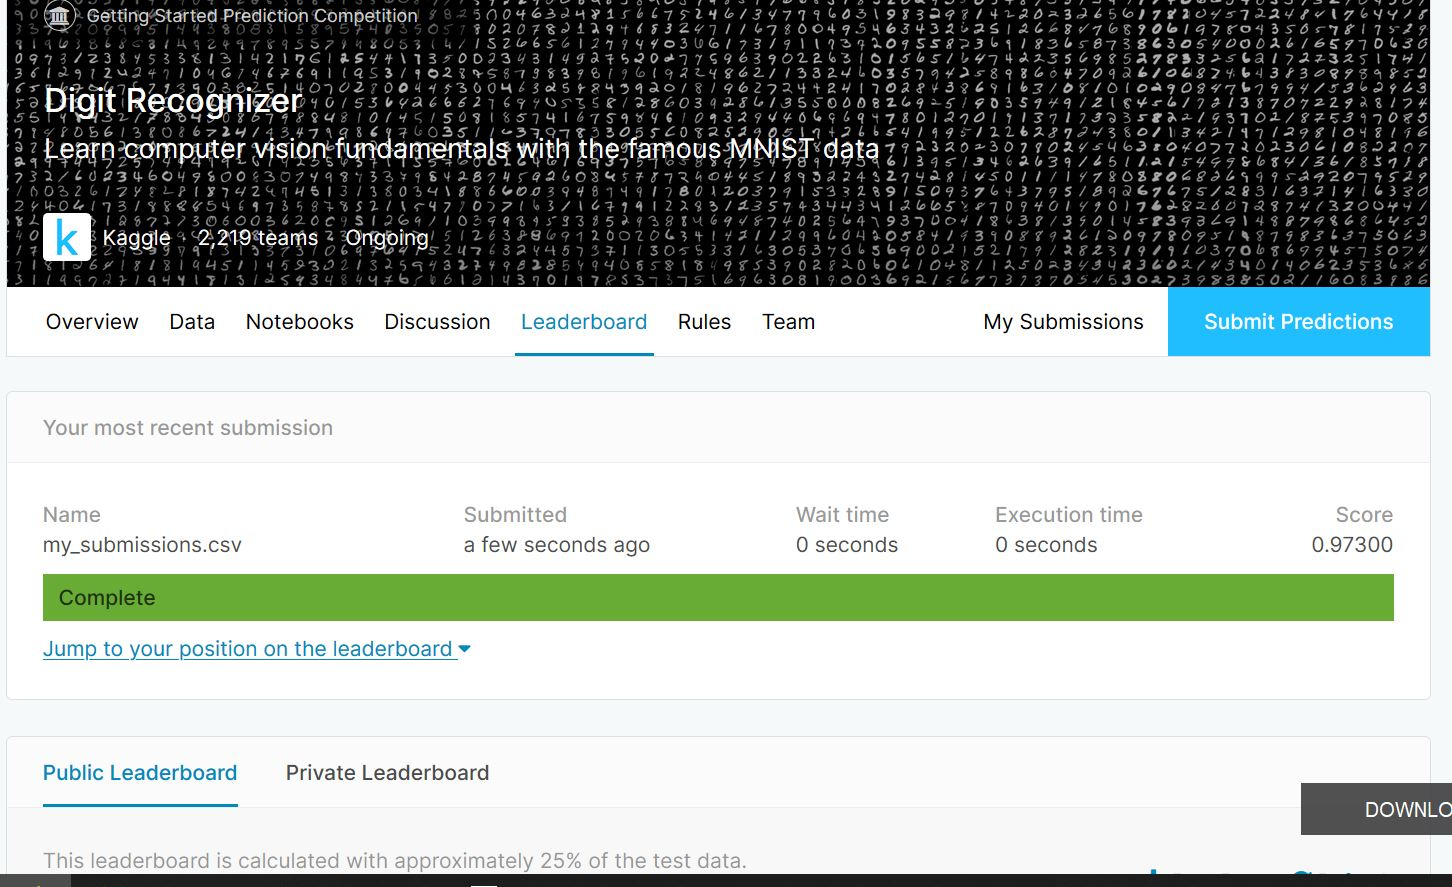

In [179]:
from IPython.display import Image, display
display(Image(filename=r'C:\Users\Prabhath\Pictures\Capture1.jpg', embed=True))

In [171]:
class ffn2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 258)
        self.output = nn.Linear(258, 10)
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x
model2=ffn2()
model2.cuda()

ffn2(
  (hidden): Linear(in_features=784, out_features=258, bias=True)
  (output): Linear(in_features=258, out_features=10, bias=True)
)

In [172]:
epochs=10
criterion=nn.NLLLoss(reduction='mean')
acccrit=nn.NLLLoss(reduction='sum')
train_losses=[]
optimwt=[]
optimizer=optim.Adam(model2.parameters(),lr=bestlr)
model2.apply(weights_init)
acc=0
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad() # For every iteration we need to load fresh gradients and not use old one
        log_ps=model2(images) # Call our feed forward network
        loss=criterion(log_ps,labels) #Calculate the loss
        loss.backward() # Backpropagate to calculate gradient at each neuron
        optimizer.step() # Updating weights
        accloss=acccrit(log_ps,labels)
        running_loss+=accloss.item()
        
    train_losses.append(running_loss/len(train))

    print("Epoch: {}/{}. ".format(e+1, epochs),
              "Training Loss: {:.3f}. ".format(running_loss/len(train)),)
        
for p in model2.parameters():
    optimwt.append(p[0])

Epoch: 1/10.  Training Loss: 0.352. 
Epoch: 2/10.  Training Loss: 0.156. 
Epoch: 3/10.  Training Loss: 0.106. 
Epoch: 4/10.  Training Loss: 0.073. 
Epoch: 5/10.  Training Loss: 0.054. 
Epoch: 6/10.  Training Loss: 0.040. 
Epoch: 7/10.  Training Loss: 0.026. 
Epoch: 8/10.  Training Loss: 0.019. 
Epoch: 9/10.  Training Loss: 0.013. 
Epoch: 10/10.  Training Loss: 0.009. 


In [173]:
torch.save(model2.state_dict(), 'checkpoint2.pth')

In [ ]:
#model.load_state_dict(state_dict)

In [174]:
results = []
with torch.no_grad():
    model2.eval()
    for images in testloader:
        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim = 1)
        results.append(top_class.cpu().numpy().flatten().tolist())


In [175]:
pred=[j for i in results for j in i]
len(pred)

28000

In [176]:
predictions = np.array(pred)
print(predictions[:5])
print(predictions.shape)

[2 0 9 9 3]
(28000,)


In [177]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("my_submissions2.csv", index=False, header=True)

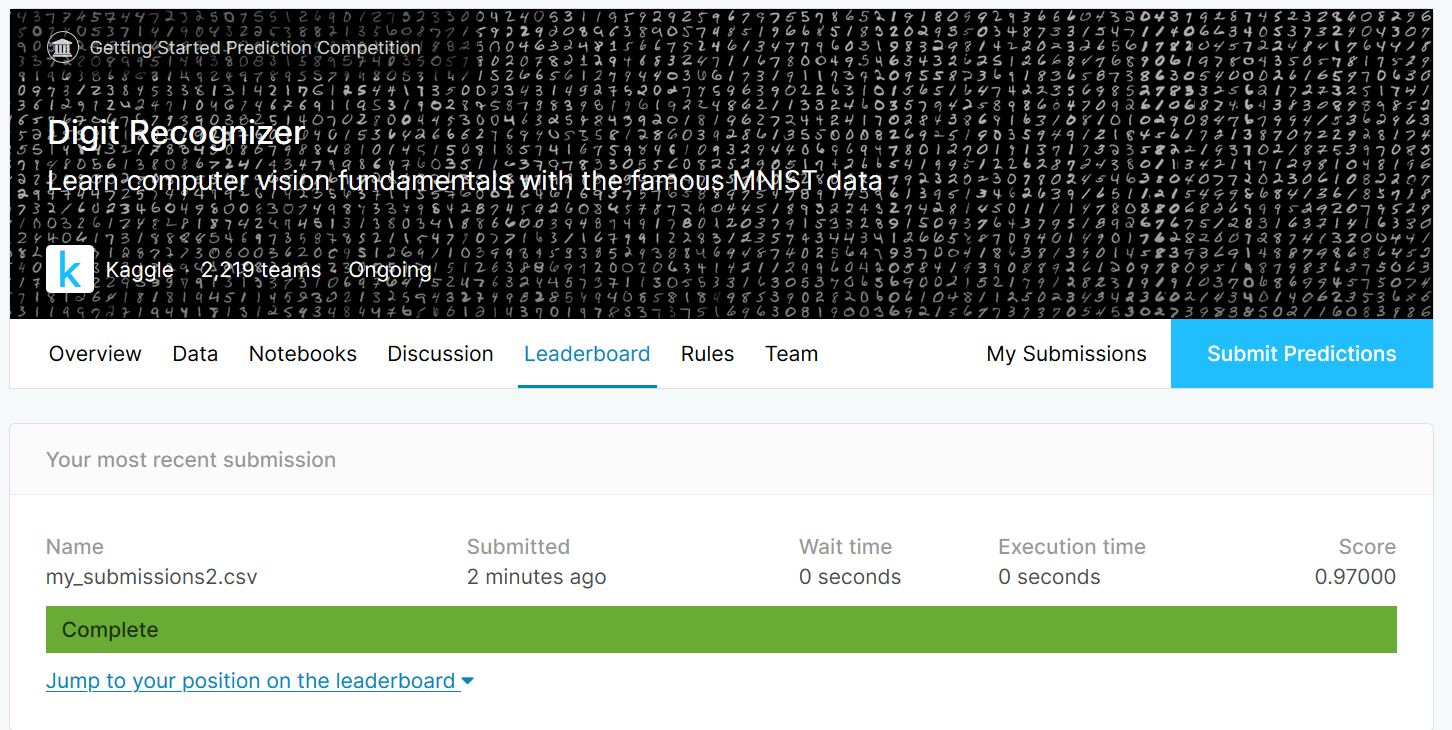

In [180]:
display(Image(filename=r'C:\Users\Prabhath\Pictures\Capture2.jpg', embed=True))